In [27]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Load preprocessed data
df = pd.read_csv('../../data/interim/brent_oil_log_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
with open('../../data/raw/events.csv') as f:
    lines = f.readlines()
    for i, line in enumerate(lines[:10]):
        print(f"{i+1}: {line.strip()}")


1: event_id,event_date,event_name,description
2: E01,2008-09-15,Global Financial Crisis,Lehman Brothers collapse and demand shock causing Brent to spike and then crash
3: E02,2010-01-01,Arab Spring unrest,Political instability begins across Middle East affecting supply expectations
4: E03,2011-03-15,Libyan Civil War,Major oil exporter disrupted by civil conflict reducing supply
5: E04,2014-11-01,OPEC production stance change,OPEC refuses to cut output amid falling prices accelerating the 2014‑16 crash
6: E05,2016-01-01,Iran sanctions lifted,Iran returns to global market increasing supply and pressuring prices
7: E06,2018-10-01,US Iran sanctions reimposed,"Restricts Iran oil exports, tightening markets"
8: E07,2019-09-14,Saudi Aramco attack,Drone strike on major facility temporarily disrupts Saudi supply
9: E08,2020-03-08,Russia–Saudi oil price war,Saudi discount & Russia output trigger 30% drop in days :contentReference[oaicite:1]{index=1}
10: E09,2020-04-20,WTI negative pricing,"Histo

In [30]:
# Load events from CSV (assume columns: Date, Event)
events_df = pd.read_csv('../../data/raw/events.csv')
events_df['event_date'] = pd.to_datetime(events_df['event_date'])

# Convert to dictionary: {'YYYY-MM-DD': 'Event Description'}
events = {row['event_date'].strftime('%Y-%m-%d'): row['event_name'] for _, row in events_df.iterrows()}


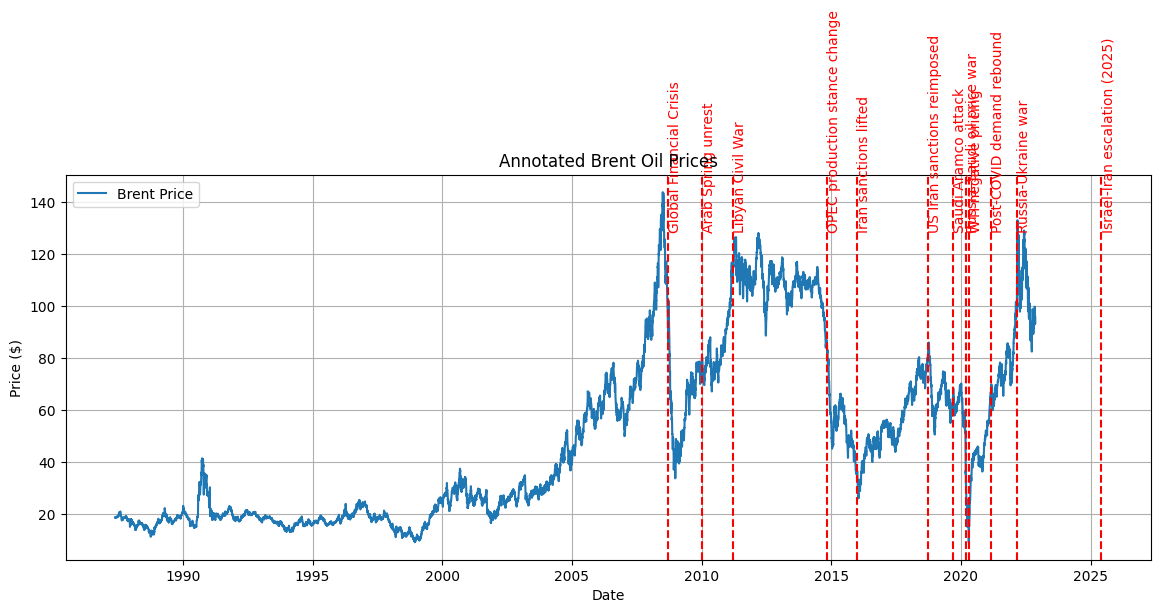

In [31]:
# Visualize with event markers
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Price'], label='Brent Price')
for date, label in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
    plt.text(pd.to_datetime(date), df['Price'].max()*0.9, label, rotation=90, color='red')
plt.title("Annotated Brent Oil Prices")
plt.xlabel("Date"); plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Save for use in analysis
# Ensure the 'data/' directory exists
os.makedirs('data', exist_ok=True)

# Save the key events
with open('../../data/key_events.json', 'w') as f:
    json.dump(events, f)
